In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import itertools
import random

from scipy import stats

In [2]:
# Parameters
data_file = 'data_original_m6.csv'
index_col = 0
shrink = 1
feature_range = (0, 1)
train_test_split = 0.8

# Training
lstm_units = 50
epochs = 20
batch_size = 10

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

In [3]:
tickers_split = [
 ['ABBV', 'ACN', 'AEP', 'AIZ', 'ALLE', 'AMAT', 'AMP', 'AMZN', 'AVB'],
 ['AVY', 'AXP', 'BDX', 'BF-B', 'BMY', 'BR', 'CARR', 'CDW', 'CE', 'CHTR'],
 ['CNC', 'CNP', 'COP', 'CTAS', 'CZR', 'DG', 'DPZ', 'DXC', 'META', 'FTV'],
 ['GOOG', 'GPC', 'HIG', 'HST', 'JPM', 'KR', 'OGN', 'PG', 'PPL', 'PRU'],
 ['PYPL', 'ROL', 'ROST', 'UNH', 'URI', 'V', 'VRSK', 'WRK', 'XOM', 'IVV'],
 ['IWM', 'EWU', 'EWG', 'EWL', 'EWQ', 'IEUS', 'EWJ', 'EWT', 'MCHI'],
 ['INDA', 'EWY', 'EWA', 'EWH', 'EWZ', 'EWC', 'IEMG', 'LQD', 'HYG', 'SHY'],
 ['IEF', 'TLT', 'SEGA.L', 'IEAA.L', 'HIGH.L', 'JPEA.L', 'IAU', 'SLV', 'GSG', 'REET'],
 ['ICLN', 'IXN', 'IGF', 'IUVL.L', 'IUMO.L', 'SPMV.L', 'IEVL.L', 'IEFM.L', 'MVEU.L', 'XLK'],
 ['XLF', 'XLV', 'XLE', 'XLY', 'XLI', 'XLC', 'XLU', 'XLP', 'XLB', 'VXX']
 ]

# Create empty lists to store all results_btf and results_normal dataframes
all_results_btf = []
all_results_normal = []

for ticker in tickers_split:
    
    # Saving name
    saving_name = 'results_m6_' + ticker[0] + '_' + ticker[-1] + '_e' + str(epochs) + '.csv'

    # Load 'results'
    index_col = 0
    results = pd.read_csv(saving_name, index_col=index_col)

    # Slice the DataFrame to get every other row starting from the first row
    results_btf = results.iloc[::2].reset_index(drop=True)

    # Add the results_btf dataframe to the list
    all_results_btf.append(results_btf)

    # Slice the DataFrame to get every other row starting from the second row
    results_normal = results.iloc[1::2].reset_index(drop=True)

    # Add the results_normal dataframe to the list
    all_results_normal.append(results_normal)

# Concatenate all results_btf and results_normal dataframes
all_results_btf = pd.concat(all_results_btf)
all_results_normal = pd.concat(all_results_normal)

# Reset the index of all_results_btf and all_results_normal
all_results_btf = all_results_btf.reset_index(drop=True)
all_results_normal = all_results_normal.reset_index(drop=True)

display(all_results_btf)
display(all_results_normal)

,ticker,look_back,look_front,trainScore,testScore
0,ABBV,1,1,1.067051,1.792951
1,ABBV,2,2,1.248412,2.198803
2,ABBV,3,3,1.250681,2.562286
3,ACN,1,1,3.078220,5.098300
4,ACN,2,2,3.961943,6.012084
...,...,...,...,...,...
664,XLB,2,2,0.873291,1.059331
665,XLB,3,3,0.818074,1.229020
666,VXX,1,1,3.515944,11.001799
667,VXX,2,2,2.433452,6.514227


,ticker,look_back,look_front,trainScore,testScore
0,ABBV,2,0,2.346681,1.860517
1,ABBV,4,0,2.639484,2.307056
2,ABBV,6,0,2.800527,2.390052
3,ACN,2,0,6.675165,6.249303
4,ACN,4,0,7.191344,6.842967
...,...,...,...,...,...
664,XLB,4,0,1.719767,1.243541
665,XLB,6,0,1.872619,1.303378
666,VXX,2,0,4.531337,10.912903
667,VXX,4,0,3.840140,5.661346


In [15]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Pairwise results
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

# Slice the DataFrame to get every other row starting from the first row
results_btf = all_results_btf

# Slice the DataFrame to get every other row starting from the second row
results_normal = all_results_normal

# Create a new DataFrame with the given expressions
df_diff = pd.DataFrame({
    # 'trainScore_diff': np.round(((results_btf['trainScore']/results_normal['trainScore'] - 1)*100), 4),
    'testScore_diff': np.round((results_btf['testScore']/results_normal['testScore'] - 1)*100, 4)
})

def color_cells(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

# Apply the color_cells function to df_diff
df_diff_styled = df_diff.style.applymap(color_cells)
print('Value of the Future (VoF), the percentual difference from original windowing to BtF on RMSE:\n')
print('(RED values = BTF beats original windowing strategy)')
# display(df_diff_styled)

print(f'\nNumber of negative elements: {(df_diff <= 0).sum().sum()} over {df_diff.shape[0]*df_diff.shape[1]} elements ({round(((df_diff <= 0).sum().sum() / (df_diff.shape[0]*df_diff.shape[1])) * 100, 2)} %)')

Value of the Future (VoF), the percentual difference from original windowing to BtF on RMSE:

(RED values = BTF beats original windowing strategy)

Number of negative elements: 528 over 669 elements (78.92 %)


In [5]:
counts = df_diff.stack().value_counts()
df_counts = counts.to_frame(name='counts')
display(df_counts[df_counts['counts'] > 1])

,counts
-3.6315,4
-18.9844,4
5.4358,4
-8.1623,4
-9.8832,4
...,...
-6.4301,2
-3.0450,2
7.8999,2
0.7825,2


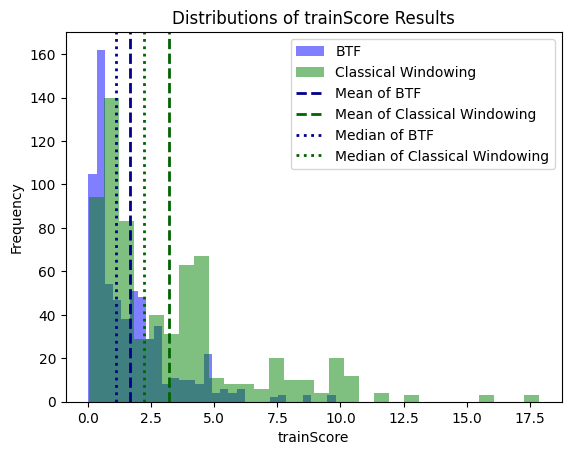

,Test,Statistic,P Value,Decision
0,Mann-Whitney U Test,147434.000000,3.315979e-27,Reject H0
1,Kruskal-Wallis H Test,116.715526,3.313424e-27,Reject H0
2,Wilcoxon Signed-Rank Test,0.000000,3.274848e-111,Reject H0


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #


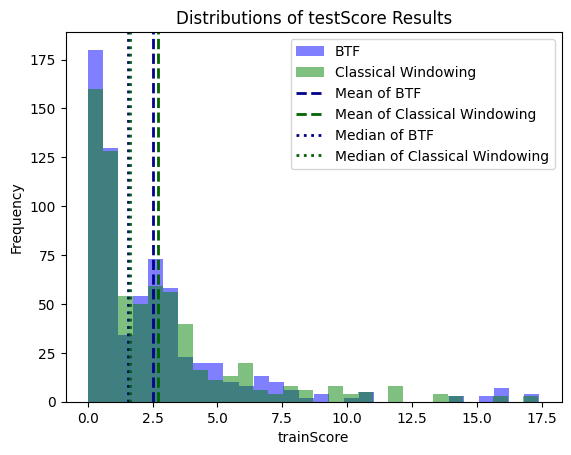

,Test,Statistic,P Value,Decision
0,Mann-Whitney U Test,212515.000000,1.109212e-01,NOT Reject H0
1,Kruskal-Wallis H Test,2.541273,1.109053e-01,NOT Reject H0
2,Wilcoxon Signed-Rank Test,48464.000000,4.768684e-37,Reject H0


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #


In [6]:
import matplotlib.pyplot as plt

pvalue = 0.05

for to_plot in ['trainScore', 'testScore']:

    # Extract the 'trainScore' columns
    score_btf = all_results_btf[to_plot]
    score_normal = all_results_normal[to_plot]

    # Calculate the means and medians
    mean_btf = score_btf.mean()
    mean_normal = score_normal.mean()
    median_btf = score_btf.median()
    median_normal = score_normal.median()

    # Create a figure
    plt.figure()

    label_BTF = 'BTF'
    label_Normal = 'Classical Windowing'

    # Plot histograms
    plt.hist(score_btf, bins=30, color='blue', alpha=0.5, label=label_BTF)
    plt.hist(score_normal, bins=30, color='green', alpha=0.5, label=label_Normal)

    # Plot means
    plt.axvline(mean_btf, color='darkblue', linestyle='dashed', linewidth=2, label='Mean of '+label_BTF)
    plt.axvline(mean_normal, color='darkgreen', linestyle='dashed', linewidth=2, label='Mean of '+label_Normal)

    # Plot medians
    plt.axvline(median_btf, color='darkblue', linestyle='dotted', linewidth=2, label='Median of '+label_BTF)
    plt.axvline(median_normal, color='darkgreen', linestyle='dotted', linewidth=2, label='Median of '+label_Normal)

    # Add title and labels
    plt.title(f'Distributions of {to_plot} Results')
    plt.xlabel('trainScore')
    plt.ylabel('Frequency')

    # Add legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

    # Initialize a list to store the results
    results = []

    # Perform the Mann-Whitney U Test
    u_statistic, p_value = stats.mannwhitneyu(score_btf, score_normal)
    results.append(['Mann-Whitney U Test', u_statistic, p_value, 'Reject H0' if p_value < pvalue else 'NOT Reject H0'])

    # Perform the Kruskal-Wallis H Test
    h_statistic, p_value = stats.kruskal(score_btf, score_normal)
    results.append(['Kruskal-Wallis H Test', h_statistic, p_value, 'Reject H0' if p_value < pvalue else 'NOT Reject H0'])

    # Perform the Wilcoxon Signed-Rank Test
    # Note: This test requires the two samples to be paired and of the same size
    if len(score_btf) == len(score_normal):
        w_statistic, p_value = stats.wilcoxon(score_btf, score_normal)
        results.append(['Wilcoxon Signed-Rank Test', w_statistic, p_value, 'Reject H0' if p_value < pvalue else 'NOT Reject H0'])
    else:
        results.append(['Wilcoxon Signed-Rank Test', None, None, 'Cannot perform test as the samples are not of the same size.'])

    # Convert the results to a DataFrame
    df_results = pd.DataFrame(results, columns=['Test', 'Statistic', 'P Value', 'Decision'])

    # Display the DataFrame
    display(df_results)

    print('# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #')

    